# Mini Project D7041E , Group 31

## Jacob Möller,  jacmll-9@student.ltu.se
## Emil Wiklund, emiwik-9@student.ltu.se

### Introduction

This mini project were done to futher improve our skills in and understanding of using MLP (multi-layer-percepton neural network) for supervised learning. The project utalizes the familiar dataset MNIST.

In [78]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

## Load dataset

In [79]:
#loadning image data from MNIST of handwritten digits.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

#loads 60k training images and 10k testing images (pre setting of this data load method) 
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset  = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(dataset=test_dataset, batch_size=512, shuffle=False)

source:

https://www.datascienceweekly.org/tutorials/pytorch-mnist-load-mnist-dataset-from-pytorch-torchvision#:~:text=The%20MNIST%20dataset%20is%20comprised,28%20pixels%20by%2028%20pixels.

## Data Sample

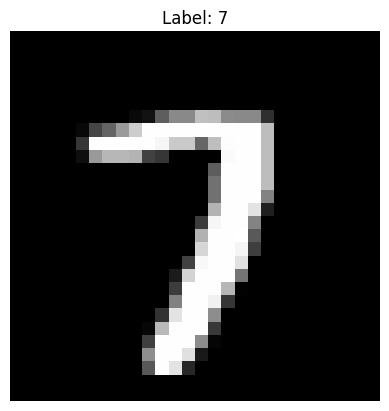

One random data sample from the MNIST data set.


In [80]:
sample_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1, shuffle=True)
images, labels = next(iter(sample_loader))

image = images.squeeze().cpu().numpy()
label= labels.item()

plt.imshow(image, cmap='gray', extent=[0,28,28,0])
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

print("One random data sample from the MNIST data set.")

## Training phase

In [81]:
def train_model(model, criterion, optimizer, num_epochs=5):
    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

## Testing phase

In [82]:
def test_model(model):
    model.eval()
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            all_predictions.extend(predictions.numpy())
            all_labels.extend(labels.numpy())
    accuracy = accuracy_score(all_labels, all_predictions)
    return accuracy

#trying to get the confusion to work
def test_model_2(model):
    model.eval()
    all_predictions = []
    all_labels = []
    all_images = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            all_predictions.extend(predictions.numpy())
            all_labels.extend(labels.numpy())
            all_images.extend(images)

    accuracy = accuracy_score(all_labels, all_predictions)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(all_labels, all_predictions)
    print("Confusion Matrix:")
    print(conf_matrix)

    return accuracy

## The model

In [83]:
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU() 
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = x.view(x.size(0), -1) #flatten the input
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)    
        x = F.softmax(x, dim = 1) 
        return x

In the model above we use the *rectified Linear Unit* activations function since it does not suffer from the vanishing gradient problem. Which can be a pitfall for other activation functions such as the *sigmoid* or *hyperbolic tangent* activation function.

source:

https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

## Main

In [84]:
torch.manual_seed(42)

# Define parameters
input_size = 28 * 28 # Is determined by the size of an image in MNIST
hidden_size = 128
output_size = 10
learning_rate = 0.001
num_epochs = 10


# start the model
model = MLPModel(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train model
train_model(model, criterion, optimizer, num_epochs)

# Test model
#accuracy = test_model(model)

# Test model with confusion
accuracy = test_model_2(model)
print(f"Accuracy on the test set: {accuracy}")

# control how many times to iterate for parameters in cells below
iterations_hidden = 6
iterations_learnRate = 6
iterations_epochs = 10

Confusion Matrix:
[[ 974    0    0    1    0    2    0    1    2    0]
 [   0 1120    4    2    0    2    1    2    4    0]
 [   6    2  989   18    2    2    5    5    3    0]
 [   1    0    3  983    0    9    0    9    5    0]
 [   4    0    4    0  942    2    7    4    3   16]
 [   7    0    1   13    0  859    4    2    5    1]
 [   9    3    3    1    1   12  923    2    4    0]
 [   2    6   17    6    0    2    0  991    0    4]
 [   4    0    3   15    4    6    4    5  932    1]
 [   6    6    2   16   18   16    1    7    4  933]]
Accuracy on the test set: 0.9646


In the confusion-matrix above the amount of correct prediction for a certain class is illustrated through the positional indexes.


In the first row (row = 0) the class corresponds to the handwritten digit of the number 0, the first column we can see that 974 samples were correctly predicted compared with its label.


At index (i = 0 , j = 3) we can see that a sample with label 0 was classified as the number 3.


## Hyper parameter tuning

**Tune amount of hidden layers.**

In [85]:
best_hidden_size = 0
best_hidden_size_accuracy = 0
best_model = 0

print("While hidden_size changes:")
for iteration in range(1, iterations_hidden):

    hidden_size = hidden_size * 2 # x^2 increase 
    print(f"Iteration: {iteration} Epoch: {num_epochs} Learning rate: {learning_rate} Hidden size: {hidden_size}")

    #need to instaciate a new model for every hidden layer_size
    model = MLPModel(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_model(model, criterion, optimizer, num_epochs)

    accuracy = test_model_2(model)
    print(f"Accuracy on the test set: {accuracy}")

    if accuracy > best_hidden_size_accuracy:
        best_hidden_size_accuracy = accuracy
        best_hidden_size = hidden_size

print(f"Best hidden_size found: {best_hidden_size} with accuracy: {best_hidden_size_accuracy}")



While hidden_size changes:
Iteration: 1 Epoch: 10 Learning rate: 0.001 Hidden size: 256
Confusion Matrix:
[[ 966    0    1    0    2    1    1    6    3    0]
 [   0 1125    2    3    0    1    1    1    2    0]
 [   8    3  978   15    1    0    1   12   12    2]
 [   0    1    1  987    0    5    0    9    3    4]
 [   2    0    4    0  943    1    3    9    0   20]
 [   5    1    1   12    3  857    3    3    3    4]
 [   6    4    1    1   11   14  914    2    5    0]
 [   0    4    8   10    0    0    0 1001    0    5]
 [   4    3    2   33    5    4    2    8  902   11]
 [   3    7    0   10    9    2    1   16    0  961]]
Accuracy on the test set: 0.9634
Iteration: 2 Epoch: 10 Learning rate: 0.001 Hidden size: 512
Confusion Matrix:
[[ 964    0    1    3    1    6    1    0    2    2]
 [   0 1122    3    3    0    2    2    1    2    0]
 [   6    1  983    7    6    0    3    6   18    2]
 [   0    0    5  972    1   15    0    3    6    8]
 [   0    0    3    0  964    1    2   

**Tune learningrate**

In [89]:
best_learning_rate = 0
best_accuracy_learnRate = 0

learning_rate = 0.001

#init a model with the best hidden_size
model = MLPModel(input_size, best_hidden_size, output_size)

print(f"learning rate = {learning_rate}")


print("While learning_rate changes:")
for iteration in range(1, iterations_learnRate):
    learning_rate = learning_rate / 10
    print(f"Iteration: {iteration} Epoch: {num_epochs} Learning rate: {learning_rate} Hidden size: {best_hidden_size}")


    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_model(model, criterion, optimizer, num_epochs)

    accuracy = test_model_2(model)
    print(f"Accuracy on the test set: {accuracy}")

    if accuracy > best_accuracy_learnRate:
        best_accuracy_learnRate = accuracy
        best_learning_rate = learning_rate

print(f"Best learning rate found: {best_learning_rate} with accuracy: {best_accuracy_learnRate}")



learning rate = 0.001
While learning_rate changes:
Iteration: 1 Epoch: 10 Learning rate: 0.0001 Hidden size: 1024
Confusion Matrix:
[[ 968    0    1    3    0    3    1    2    2    0]
 [   0 1118    4    3    0    1    3    3    3    0]
 [   7    1  989    6    5    0    3   13    7    1]
 [   1    0    4  987    0    2    0    9    4    3]
 [   2    1    5    0  943    0    7    4    3   17]
 [   9    1    1   22    1  834    8    5    6    5]
 [  11    3    3    2    4    7  920    2    6    0]
 [   0    7   12    7    0    1    0  997    1    3]
 [   4    0    2   11    3    3    5   13  931    2]
 [   6    6    1   17   13    1    1   14    3  947]]
Accuracy on the test set: 0.9634
Iteration: 2 Epoch: 10 Learning rate: 1e-05 Hidden size: 1024
Confusion Matrix:
[[ 966    0    1    2    0    3    5    1    2    0]
 [   0 1122    3    1    1    1    4    1    2    0]
 [   6    2  994    5    5    0    3    8    8    1]
 [   0    0    6  981    0    4    1    7    8    3]
 [   1    0 

**Tune number of epochs**

In [91]:
best_num_epochs = 0
best_num_epoch_accuracy = 0


print("While num_epochs changes:")
for iteration in range(1, iterations_epochs):
    num_epochs += 10
    print(f"Iteration: {iteration} Epoch: {num_epochs} Learning rate: {best_learning_rate} Hidden size: {best_hidden_size}")

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=best_learning_rate)

    train_model(model, criterion, optimizer, num_epochs)

    accuracy = test_model_2(model)
    print(f"Accuracy on the test set: {accuracy}")

    if accuracy > best_num_epoch_accuracy:
        best_num_epoch_accuracy = accuracy
        best_num_epochs = num_epochs

print(f"Best number of epochs found: {best_num_epochs} with accuracy: {best_num_epoch_accuracy}")

While num_epochs changes:
Iteration: 1 Epoch: 30 Learning rate: 1.0000000000000002e-06 Hidden size: 1024
Confusion Matrix:
[[ 966    0    1    2    0    3    5    1    2    0]
 [   0 1121    3    1    0    1    4    2    3    0]
 [   6    2  997    5    4    0    4    8    5    1]
 [   0    0    6  982    0    4    1    7    7    3]
 [   1    0    5    0  952    0    6    1    2   15]
 [   6    1    1    7    1  858    7    2    5    4]
 [   6    2    0    1    3    7  933    1    5    0]
 [   0    7   16    2    2    1    0  987    2   11]
 [   3    0    3    7    3    4    5    5  941    3]
 [   5    6    1   13   11    2    1   10    4  956]]
Accuracy on the test set: 0.9693
Iteration: 2 Epoch: 40 Learning rate: 1.0000000000000002e-06 Hidden size: 1024
Confusion Matrix:
[[ 966    0    1    2    0    3    5    1    2    0]
 [   0 1122    3    1    0    1    4    1    3    0]
 [   6    2  998    5    3    0    4    8    5    1]
 [   0    0    6  981    0    3    1    7    7    5]
 [  

## Findings


1. While tuning the amount of hidden layers within the model we found that the accuracy gains diminishes after layers size 1024 (2^10). This is probably due to the model becoming too complex for the classification and thus overfitting occurs so that the model won't be generalized to patterns in the data, instead becoming a bit more biased to the training data.


2. We expected the learning rate to have the most impact of the parameters to be tuned but we had some strange results, while decreasing the learning from our initial value 0.001 by a factor of 0.1 the accuracy was negatively affected. We then did some further testing with the initial learning rate since we assumed that we stepped past the minimum lost function already in the first iteration of our loop to tune the learning rate. Sadly this assumtion were not accurate see the last markdown section of the notebook.


3. As expected, increasing the number of epochs slightly increased the accuracy for each iteration, naturally at the price of an increase in execution time.

In [94]:
#best parameters found: hidden layers = 1024, learning rate = 1.0000000000000002e-06, number of epochs = 110  | 24-01-09 17:40

print(f"best parameters found: hidden layers = {best_hidden_size}, learning rate = {best_learning_rate}, number of epochs = {best_num_epochs}")

#trying with the best learning from the first iterations of tests when we tuned the hidden_size parameter, where the best learning rate seemed to be 0.001,
# since the accuracy were lower with the best hidden_size and learning_rate = 0.0001 in the first iteration while changening the learning rate.

print("some manual testing for learning rate = 0.001 \n")
# start the model with the best parameters
model = MLPModel(input_size, best_hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train model with the best parameters 
train_model(model, criterion, optimizer, best_num_epochs)

# Test model with confusion
accuracy = test_model_2(model)
print(f"Accuracy on the test set: {accuracy}")

best parameters found: hidden layers = 1024, learning rate = 1.0000000000000002e-06, number of epochs = 110
some manual testing for learning rate = 0.001 

Confusion Matrix:
[[ 973    1    1    0    1    0    0    3    1    0]
 [   0 1127    5    1    0    0    0    1    1    0]
 [   3    1 1015    1    1    0    3    8    0    0]
 [   3    0    7  990    0    0    0    7    2    1]
 [   2    1    6    0  951    0    3    9    0   10]
 [   3    2    0   18    0  847    5   12    3    2]
 [   7    4    1    0    3    2  938    3    0    0]
 [   0    4    9    1    0    0    0 1013    0    1]
 [  11    0    8    1    2    2    3    6  936    5]
 [   2    2    2    4   16    0    1   21    2  959]]
Accuracy on the test set: 0.9749


## Conclusion

*The best parametes found:*
```best parameters found: hidden layers = 1024, learning rate = 1.0000000000000002e-06, number of epochs = 110```

